# LFP Analysis

In [5]:
import xarray
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import viridis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Visualizing LFP signals across all trials across all brain areas

### Reading dataset

In [2]:
# Reading data from only one session of a mouse
dset = xarray.load_dataset(filename_or_obj='/home/sangeetha/Work/Germany/bootcamp/data/steinmetz_neuromatch_dataset/steinmetz_2016-12-14_Cori.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

In [3]:
# extracting only the lfp data to simplify analysis
lfp_dset = dset.lfp
lfp_dset

<xarray.DataArray 'lfp' (brain_area_lfp: 7, trial: 364, time: 250)>
array([[[-2.85079365e+00, -4.03968254e+00, -4.19523810e+00, ...,
          7.26984127e-01, -2.21746032e+00,  1.09936508e+01],
        [ 9.14263039e+00,  1.14759637e+01,  1.47648526e+01, ...,
          3.03151927e+00,  9.20929705e+00,  7.97596372e+00],
        [ 2.65668934e+00,  4.54557823e+00,  7.65668934e+00, ...,
         -1.79877551e+01, -1.76544218e+01, -1.15433107e+01],
        ...,
        [-3.73741497e+00, -1.10408163e+00, -2.80408163e+00, ...,
          6.68480726e+00,  1.34514739e+01, -9.29705215e-02],
        [-6.76190476e-01, -3.77619048e+00, -8.06507937e+00, ...,
          2.03349206e+01,  1.96126984e+01,  7.19047619e+00],
        [ 3.18326531e+01,  2.46215420e+01,  1.04659864e+01, ...,
         -5.93401361e+00, -1.26451247e+01, -1.59229025e+01]],

       [[ 9.41496599e-01, -4.18367347e-02, -8.50850340e+00, ...,
          4.52482993e+00, -1.68367347e-02,  8.23316327e+00],
        [ 8.85068027e+00,  7.84234694e+00,  7.06734694e+00, ...,
          2.85068027e+00,  1.97568027e+00,  6.57568027e+00],
        [ 1.14316327e+01, -2.35034014e-01,  4.95663265e+00, ...,
         -1.97100340e+01, -1.91850340e+01, -9.22670068e+00],
...
        [ 2.80408163e+00,  1.77707483e+01,  2.32540816e+01, ...,
         -1.15125850e+01, -1.95918367e-01,  4.32074830e+00],
        [-1.01176871e+01, -3.34353741e-01,  7.71564626e+00, ...,
         -1.76870748e-02,  1.30823129e+01,  7.11564626e+00],
        [ 1.50935374e+01,  6.76020408e+00,  2.27687075e+00, ...,
          3.46020408e+00,  1.41102041e+01, -5.80646259e+00]],

       [[ 1.12764378e+00, -5.85417440e+00, -7.71781076e+00, ...,
          1.09458256e+01,  5.78218924e+00,  1.44640074e+01],
        [-3.92912801e+00, -6.65640074e+00,  1.47996289e+00, ...,
          1.15708720e+01,  1.94526902e+01,  1.67163265e+01],
        [ 7.94990724e+00, -6.82745826e-02, -1.21319109e+01, ...,
         -2.12500928e+01, -6.23191095e+00, -1.09554731e+00],
        ...,
        [ 1.08935065e+01,  1.26844156e+01,  2.68441558e+00, ...,
          3.86623377e+00, -5.24675325e-01, -4.33376623e+00],
        [-1.07480519e+01, -8.59350649e+00, -2.16623377e+00, ...,
          9.79220779e-01,  1.14064935e+01,  4.43376623e+00],
        [ 5.38868275e+00, -3.72040816e+00, -4.64768089e+00, ...,
          1.55523191e+01,  1.60432282e+01,  5.57050093e+00]]])
Coordinates:
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * brain_area_lfp  (brain_area_lfp) object 'ACA' 'LS' 'MOs' ... 'SUB' 'VISp'

In [4]:
# converting to pandas dataframe for analysis
lfp = lfp_dset.to_dataframe()
lfp.head()

lfp
brain_area_lfp trial time          
ACA            1     0.01 -2.850794
                     0.02 -4.039683
                     0.03 -4.195238
                     0.04 -3.228571
                     0.05  0.460317

### Processing

In [7]:
# what are the brain areas from which lfp values are measured with this mouse
brain_areas = lfp.index.get_level_values(level='brain_area_lfp').unique() 
brain_areas

Index(['ACA', 'LS', 'MOs', 'CA3', 'DG', 'SUB', 'VISp'], dtype='object', name='brain_area_lfp')

In [8]:
## there are 7 different brain areas

In [12]:
# are there same number of trials in each brain area?
for brain_area in brain_areas:
    temp_df = lfp.xs(brain_area, level='brain_area_lfp')
    n_trials = len(temp_df.index.get_level_values(level='trial').unique())
    print(f"{n_trials} trials in {brain_area}")

364 trials in ACA
364 trials in LS
364 trials in MOs
364 trials in CA3
364 trials in DG
364 trials in SUB
364 trials in VISp


In [13]:
# function to create a merged dataframe with time series data from all the trials for a given brain area dataframe
def create_merged_df(brain_area_df):
    all_trial_data = pd.DataFrame(columns=['time', 'lfp'])

    trials = brain_area_df.index.get_level_values('trial').unique()

    for trial in trials:
        trial_data = brain_area_df.loc[trial]
        all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)

    return all_trial_data

### Plotting 

In [14]:
# setting xrange and yrange 
x_range=(0,2.5)
y_range = (-200., 200.)

<ipython-input-13-137e728e6503>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)
<ipython-input-13-137e728e6503>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)
<ipython-input-13-137e728e6503>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)
<ipython-input-13-137e728e6503>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(), ign

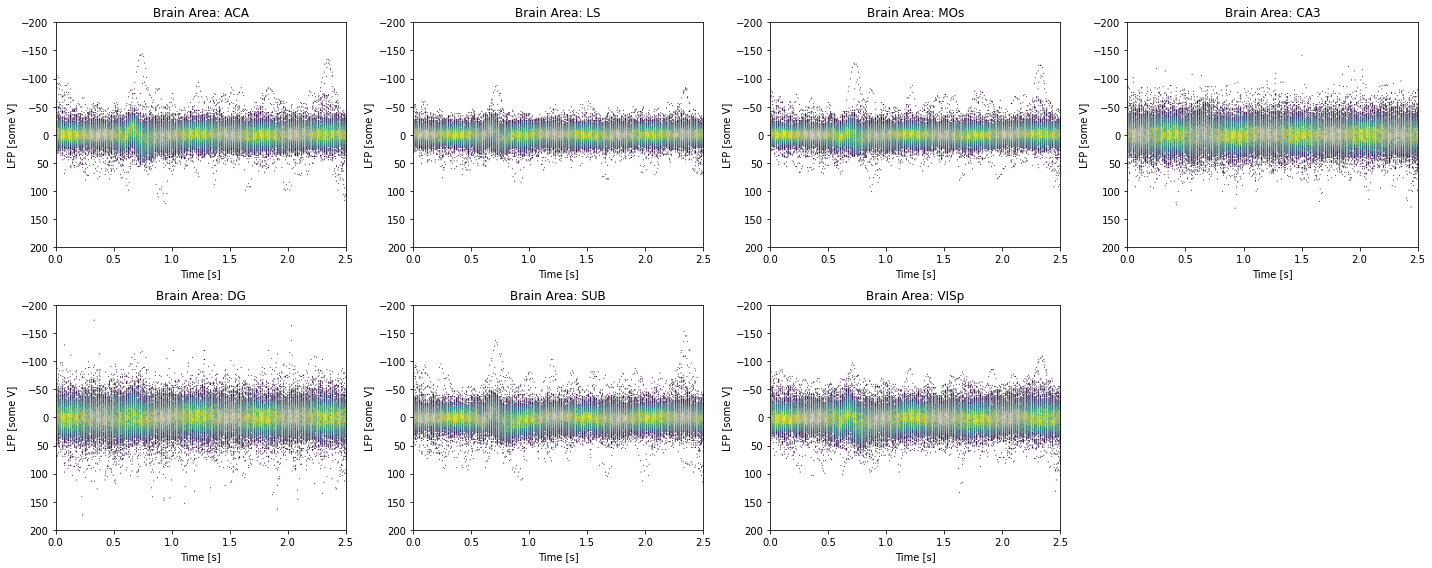

In [17]:
num_areas = len(brain_areas)
num_cols = 4 

num_rows = int(np.ceil(num_areas / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10*num_rows, 2*num_cols))

for i, brain_area in enumerate(brain_areas):
    area_data = create_merged_df(lfp.xs(brain_area, level='brain_area_lfp', axis=0))

    row = i // num_cols
    col = i % num_cols

    cvs = ds.Canvas(plot_width=400, plot_height=200, x_range=x_range, y_range=y_range)

    agg = cvs.points(area_data, 'time', 'lfp')

    img = tf.shade(agg, cmap=viridis, how='eq_hist')

    ax = axes[row, col]
    ax.imshow(img.to_pil(), extent=[0., 2.5, 200., -200.], aspect="auto")
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('LFP [some V]')
    ax.set_title(f'Brain Area: {brain_area}')

for i in range(num_areas, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

## Heatmap of mean/median/min/max LFP value in each time-bin across all the trials for each brain area

Text(0.5, 1.0, 'LFP Heatmap')

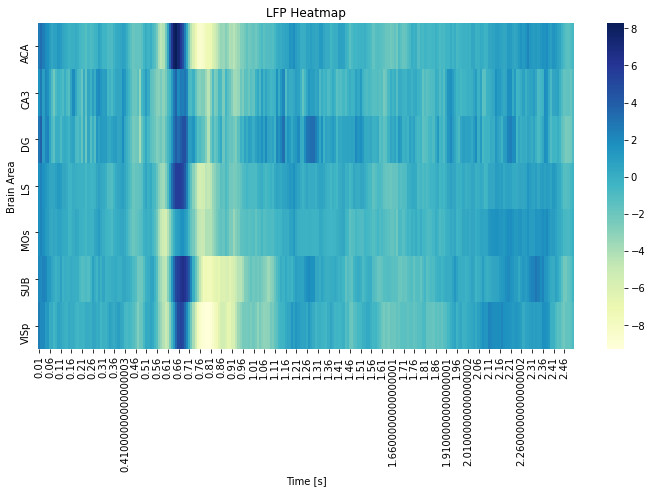

In [20]:
# mean 
lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='mean')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data, cmap="YlGnBu")

plt.xlabel('Time [s]')
plt.ylabel('Brain Area')
plt.title('LFP Heatmap')

Text(0.5, 1.0, 'LFP Heatmap')

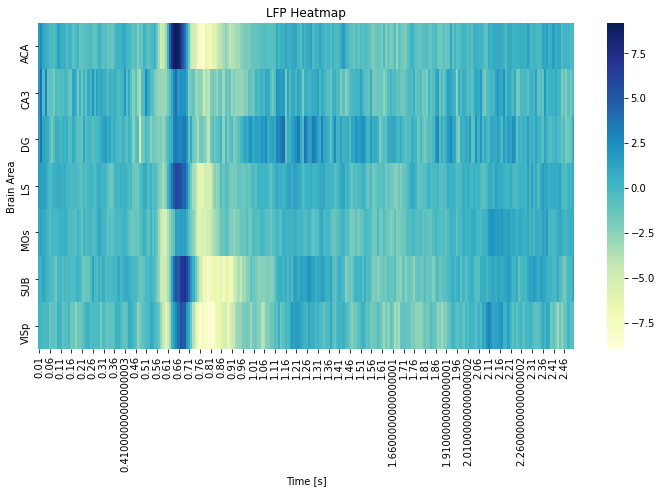

In [21]:
# median 
lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='median')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data, cmap="YlGnBu")

plt.xlabel('Time [s]')
plt.ylabel('Brain Area')
plt.title('LFP Heatmap')

Text(0.5, 1.0, 'LFP Heatmap')

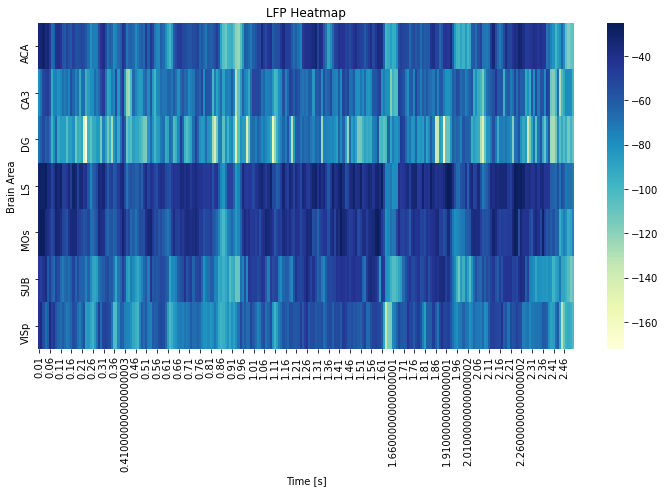

In [22]:
# min 
lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='min')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data, cmap="YlGnBu")

plt.xlabel('Time [s]')
plt.ylabel('Brain Area')
plt.title('LFP Heatmap')

Text(0.5, 1.0, 'LFP Heatmap')

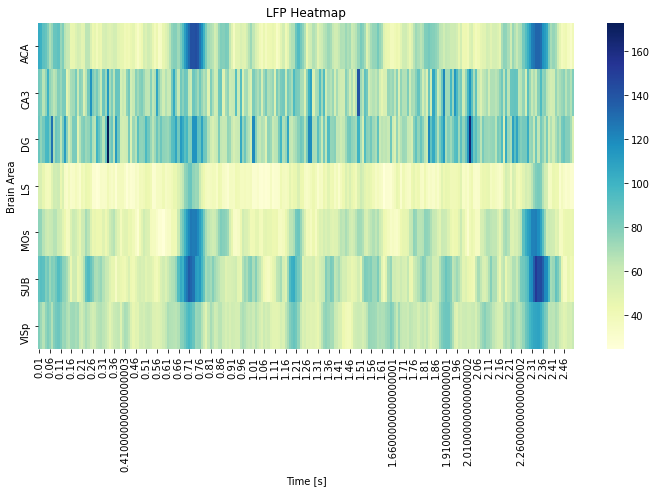

In [23]:
# max 
lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='max')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data, cmap="YlGnBu")

plt.xlabel('Time [s]')
plt.ylabel('Brain Area')
plt.title('LFP Heatmap')